**Aulia Firdatunnisa (PYTN-KS16-014)**

# Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:
*   lsoa_code: this represents a policing area
*   borough: the london borough for which the statistic is related
*   major_category: the major crime category
*   minor_category: the minor crime category
*   value: the count of the crime for that particular borough, in that particular month
*   year: the year of the summary statistic
*   month: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

*   What is the change in the number of crime incidents from 2011 to 2016?
*   What were the top 3 crimes per borough in 2016?




## Data Preprocessing

In [65]:
# Mengimpor library yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go

In [66]:
# Mengimpor dan membaca file csv
df = pd.read_csv('london_crime_by_lsoa.csv')

In [67]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30339 entries, 0 to 30338
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lsoa_code       30339 non-null  object 
 1   borough         30339 non-null  object 
 2   major_category  30339 non-null  object 
 3   minor_category  30338 non-null  object 
 4   value           30338 non-null  float64
 5   year            30338 non-null  float64
 6   month           30338 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.6+ MB


In [68]:
# Mengecek kolom yang memiliki nilai kosong pada dataset
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    1
value             1
year              1
month             1
dtype: int64

Terdapat 5 kolom yang memiliki nilai kosong atau Nan

In [69]:
# Mencari modus dari kolom yang memiliki nilai NaN, kemudian nilai NaN diisi oleh modus.
modus_major = df['major_category'].mode().values[0]
modus_minor = df['minor_category'].mode().values[0]
modus_value = df['value'].mode().values[0]
modus_year = df['year'].mode().values[0]
modus_month = df['month'].mode().values[0]

In [70]:
modus_major

'Theft and Handling'

In [71]:
modus_minor

'Possession Of Drugs'

In [72]:
modus_value

0.0

In [73]:
modus_year

2012.0

In [74]:
modus_month

4.0

In [75]:
df['major_category'] = df['major_category'].fillna('Theft and Handling')
df['minor_category'] = df['minor_category'].fillna('Possesion of Drugs')
df['value'] = df['value'].fillna('0.0')
df['year'] = df['year'].fillna('2009')
df['month'] = df['month'].fillna('4')

In [76]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Konversikan kolom year dan month menjadi interger

In [77]:
df[['year', 'month']] = df[['year', 'month']].astype(int)

Setelah diperbaiki, tidak ada lagi kolom yang memiliki nilai NaN

In [78]:
# Menampilkan 5 data teratas
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008,6


## Data Visualization

### Line Plot - Trend Kejahatan Utama di Kota London

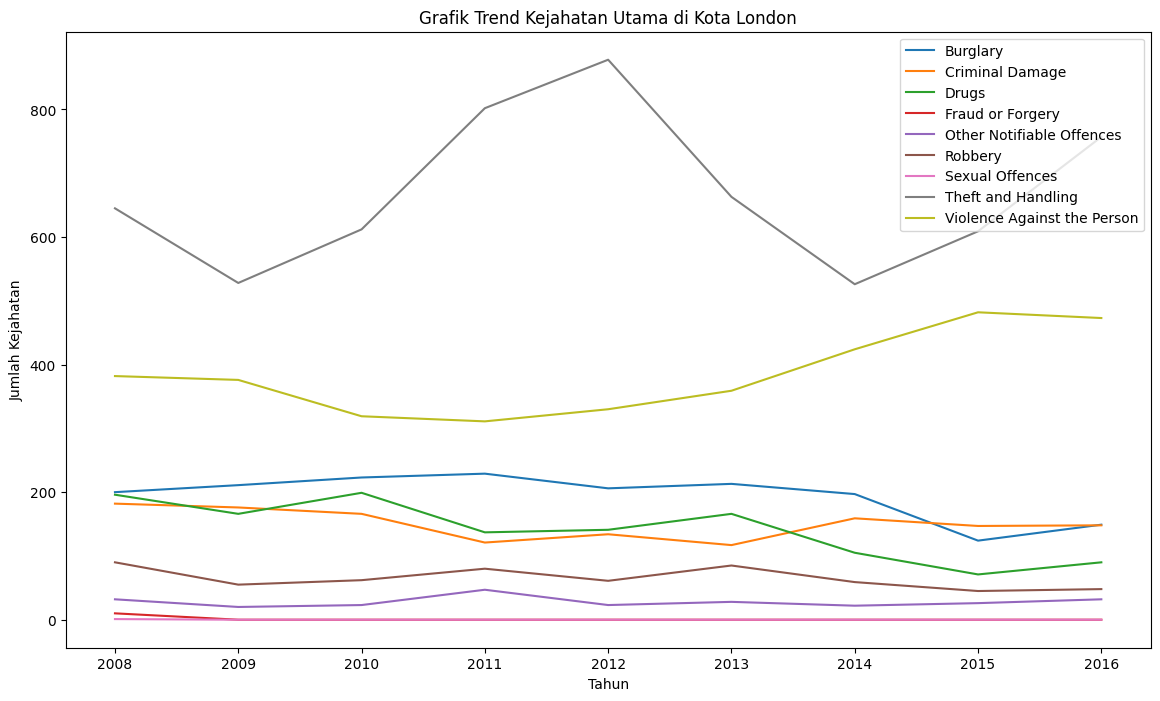

In [79]:
# Kelompokkan data berdasarkan tahun dan kategori utama
df_grouped = df.groupby(['year', 'major_category'])['value'].sum().unstack()

# Plot line chart
df_grouped.plot(kind='line', figsize=(14, 8))

plt.title('Grafik Trend Kejahatan Utama di Kota London')
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('Tahun')

plt.legend(loc='upper right')  # Menampilkan legenda

plt.show()


**Kesimpulan** : Berdasakan visualisasi di atas, kejahatan yang sering terjadi di London adalah Theft and Handling (Pencurian dan Perampokan) kejahatan ini memuncak pada tahun 2012.

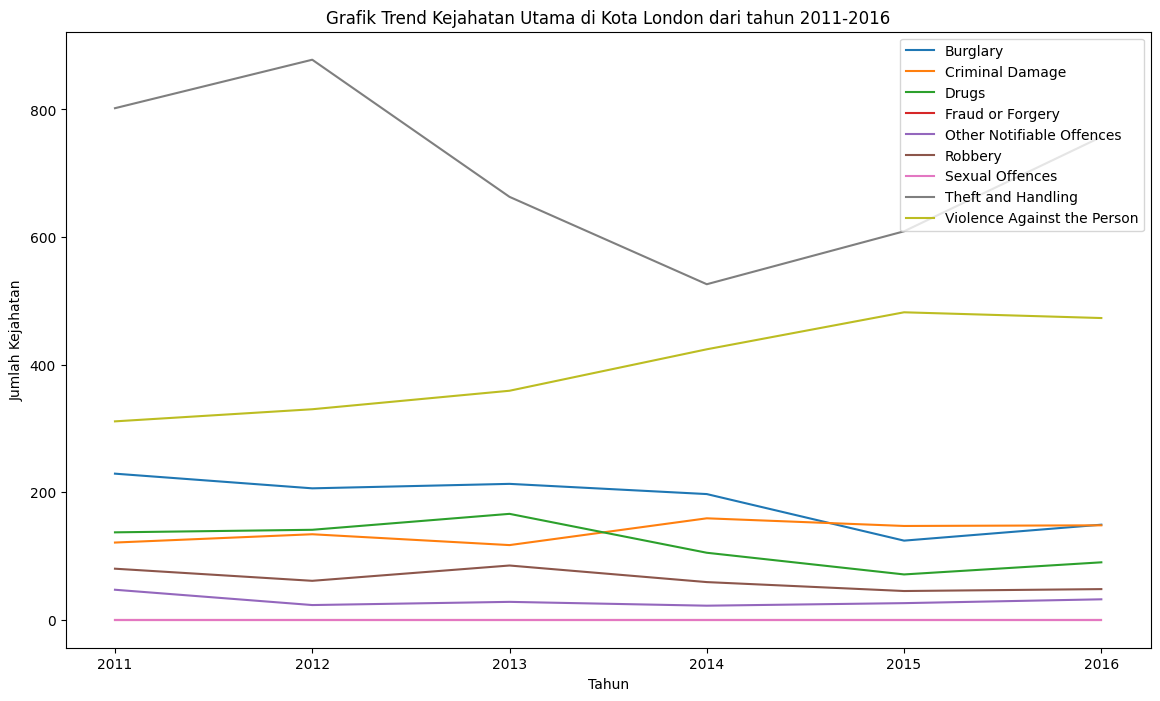

In [80]:
# Filter data hanya dari tahun 2011 hingga 2016
df_filtered = df[(df['year'] >= 2011) & (df['year'] <= 2016)]

df_grouped = df_filtered.groupby(['year', 'major_category'])['value'].sum().unstack()

# Plot line chart
df_grouped.plot(kind='line', figsize=(14, 8))

plt.title('Grafik Trend Kejahatan Utama di Kota London dari tahun 2011-2016')
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('Tahun')

plt.legend(loc='upper right')  # Menampilkan legenda

plt.show()

**Kesimpulan**: Kejahatan yang sering terjadi dari tahun 2011-2016 adalah Theft and Handling. Mengalami kenaikan pada tahun 2012, kemudian melandai dari tahun 2013-2014, namun kembali lagi marak pada tahun 2015-2016.

## Histogram

In [81]:
top5 = df['major_category'].value_counts().nlargest(5)


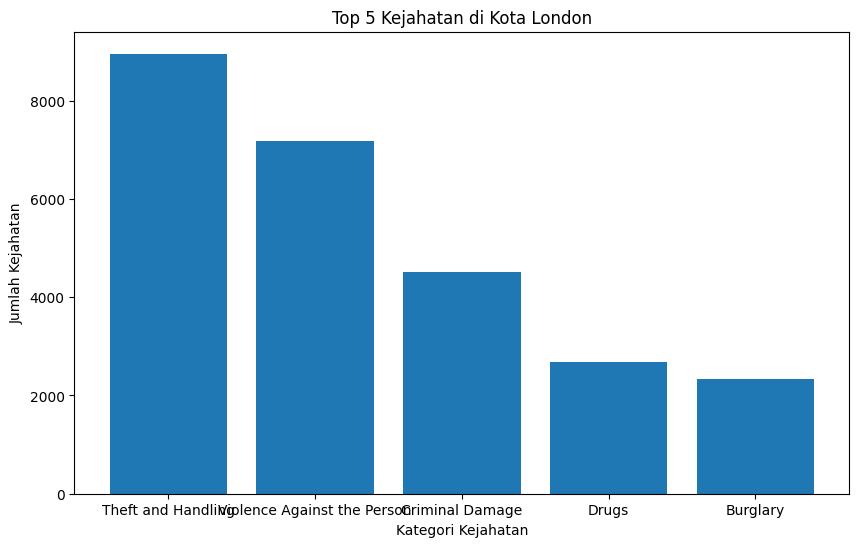

In [82]:
plt.figure(figsize=(10, 6))

# Membuat histogram
plt.bar(top5.index, top5.values)

# Memberikan judul dan label sumbu
plt.title('Top 5 Kejahatan di Kota London')
plt.xlabel('Kategori Kejahatan')
plt.ylabel('Jumlah Kejahatan')

# Menampilkan plot
plt.show()

**Kesimpulan**: Theft and Handling menjadi kasus yang paling sering terjadi di London, kemudian disusul oleh Violence Against the Peson, Criminal Damage, Drugs, dan Burglary.

## Barchart

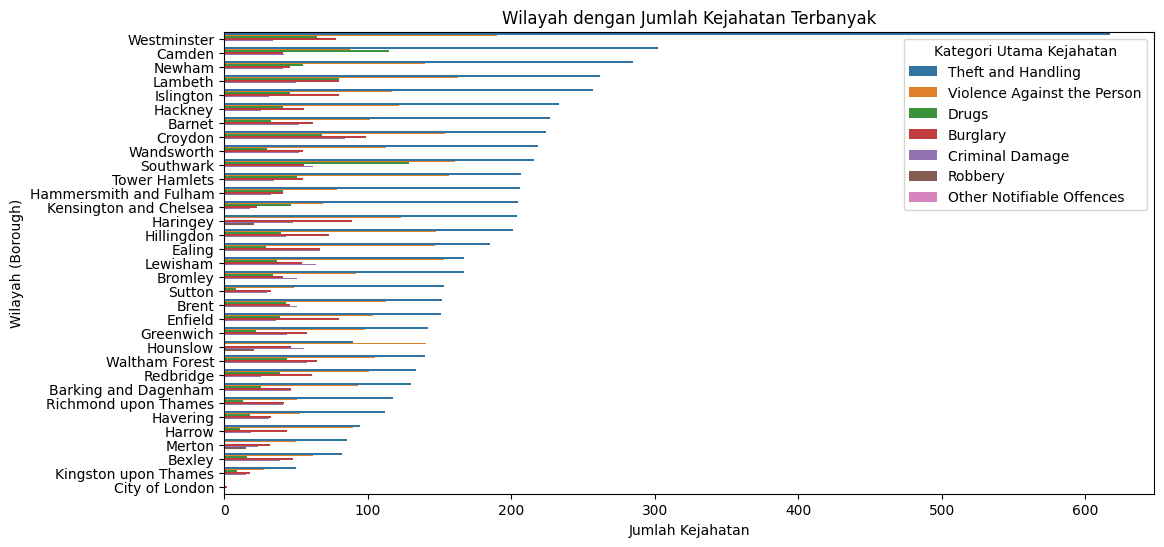

In [83]:
# Mengonversi kolom 'value' ke tipe data numerik (float)
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Menghitung jumlah kejahatan per borough dan major_category
crime_summary = df.groupby(['borough', 'major_category'])['value'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah kejahatan (dalam urutan menurun)
crime_summary = crime_summary.sort_values(by='value', ascending=False)

# Mengambil kategori kejahatan teratas per borough
top_crimes_by_borough = crime_summary.groupby('borough').head(5)

# Membuat horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='value', y='borough', hue='major_category', data=top_crimes_by_borough)

# Memberikan judul dan label sumbu
plt.title('Wilayah dengan Jumlah Kejahatan Terbanyak')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Wilayah (Borough)')

# Menampilkan legenda
plt.legend(title='Kategori Utama Kejahatan', loc='upper right')

plt.show()


**Kesimpulan**: Wilayah Westminster merupakan wilayah yang banyak terjadi kejahatan disusul wilayah Camden dan Newham. Sedangkan wilayah City of London merupakan wilayah yang paling jarang terjadi kejahatan.

## Pie Chart

In [84]:
# Buat dataframe baru untuk melihat kejahatan utama dengan persentase tinggi
major = df.groupby("major_category").sum()[["value"]]
major["percentage"] = major["value"] / df["value"].sum() * 100
major = major.sort_values("percentage",ascending=False)
major = major.reset_index()
major.head()

<ipython-input-84-fa3078cab136>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,major_category,value,percentage
0,Theft and Handling,6020.0,40.957953
1,Violence Against the Person,3456.0,23.513403
2,Burglary,1752.0,11.919989
3,Criminal Damage,1350.0,9.184923
4,Drugs,1271.0,8.647435


In [85]:
# Buat Dataframe kejahatan minornya
minor = df.groupby("minor_category").sum()[["value"]]
minor["percentage"] = minor["value"] / df["value"].sum() * 100
minor = minor.sort_values("percentage",ascending=False)
minor = minor.reset_index()
minor.head()

<ipython-input-85-23f9f7dfc4cb>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,minor_category,value,percentage
0,Other Theft,2106.0,14.328480
1,Possession Of Drugs,1190.0,8.096340
2,Theft From Motor Vehicle,1160.0,7.892230
3,Burglary in a Dwelling,1094.0,7.443190
4,Harassment,1008.0,6.858076


In [86]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1,cols=2,specs=[[{"type":"pie"}, {"type":"pie"}]],
                    subplot_titles=("Major Categories","Minor Categories"))

fig.add_trace(go.Pie(labels=major["major_category"],
                     values=major["value"],
                     name="Major Category",
                     pull=[0.1],
                     showlegend=False),1, 1)
fig.add_trace(go.Pie(labels=minor["minor_category"],
                     values=minor["value"],
                     name="Minor Category",
                     pull=[0.1],
                     showlegend=False),1, 2)

fig.update_traces(hoverinfo="label+percent+name")
fig.update_layout(title="Percentage of Crimes by Major and Minor Categories",title_x=0.5)
fig.show()

**Kesimpulan**: Bedasarkan diagram piechart. Pada kategori major atau kejahtan utama Theft And Handling (Penncurian dan pencopetan) memiliki persentasi tertinggi yaitu 41% disusul Violence and Against Person (Kekerasan terhadap individu) sebanyak 23.4% dan Buglary (Perampokan) sebanyak 11.9%. Sedangkan pada kateogori minor Other Theft (pencurian lainnya) berada di posisi tertingi dengan persentase 14.3% kemudian disusul dengan Posession of Drugs (Kepemilikan obat-obatan terlarang) dengan persentase 8.1% dan Theft from Motor Vehicle (Penjambretan).

## Boxplot

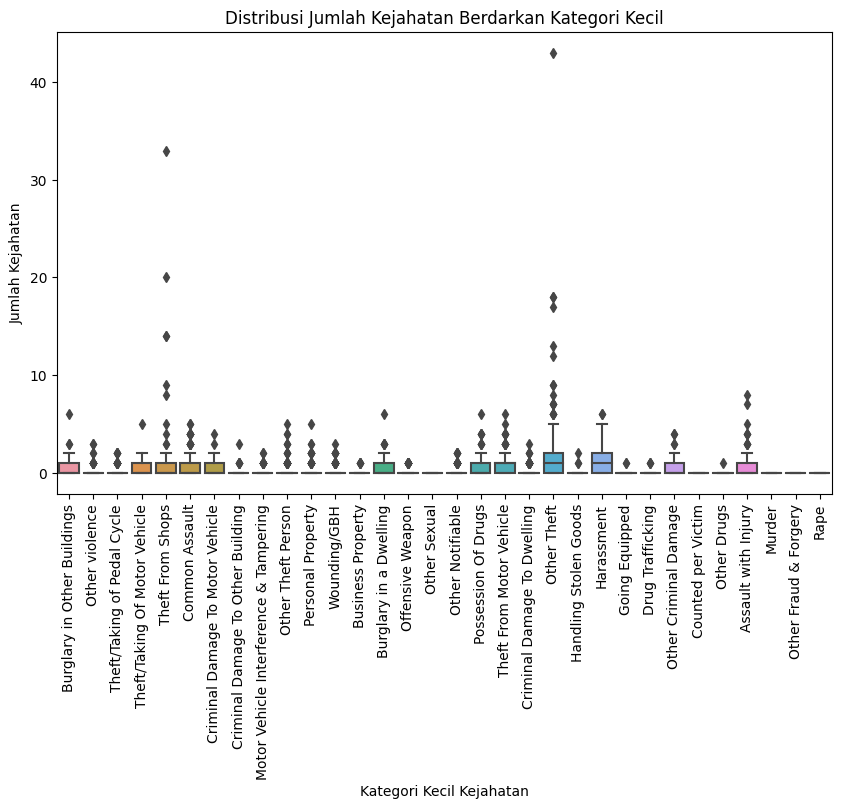

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='minor_category', y='value', data=df[df['year'] == 2016])
plt.title('Distribusi Jumlah Kejahatan Berdarkan Kategori Kecil')
plt.xlabel('Kategori Kecil Kejahatan')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=90)
plt.show()

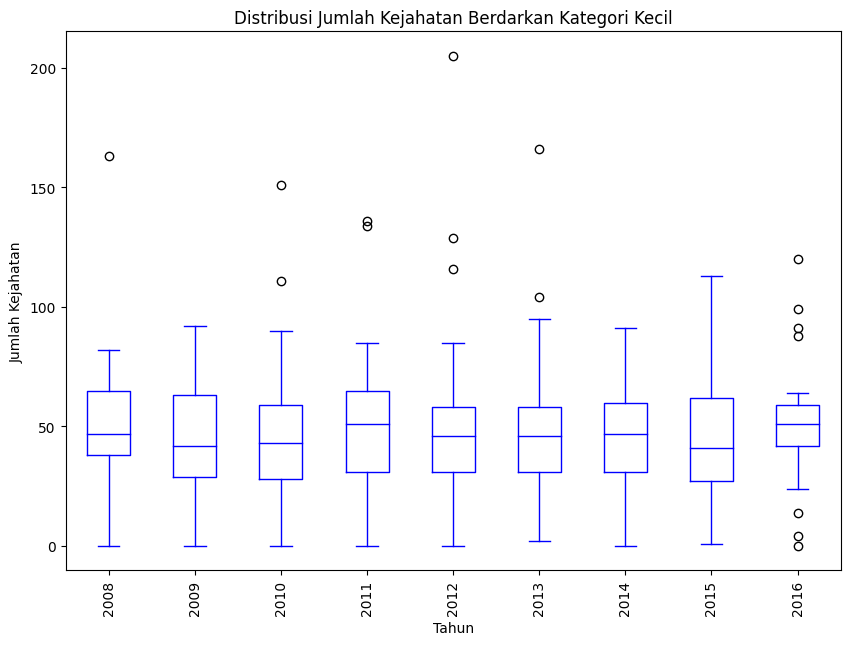

In [88]:
bp1 = df.pivot_table(index='borough', columns='year', values='value', aggfunc=sum)
bp1.plot(kind='box', figsize=(10, 7), color='blue', vert=True)

plt.title('Distribusi Jumlah Kejahatan Berdarkan Kategori Kecil')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=90)
plt.show()

**Kesimpulan**: Berdasakan grafik box plot di atas. Kasus tindakan kejahatan di kota London cenderung dinamis.

## Scatterplot

<ipython-input-89-612450c400f0>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



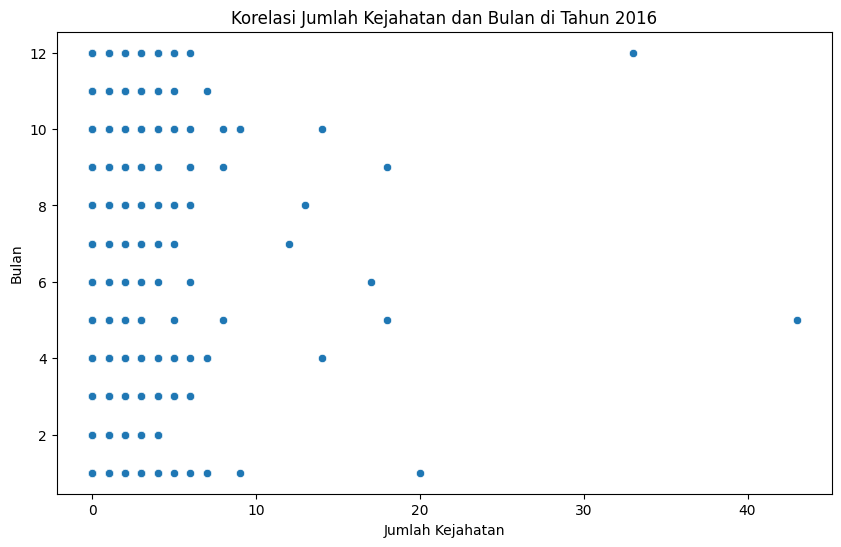

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='value', y='month', data=df[df['year'] == 2016], palette='viridis')
plt.title('Korelasi Jumlah Kejahatan dan Bulan di Tahun 2016')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Bulan')
plt.show()

## Wordclouds

In [90]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

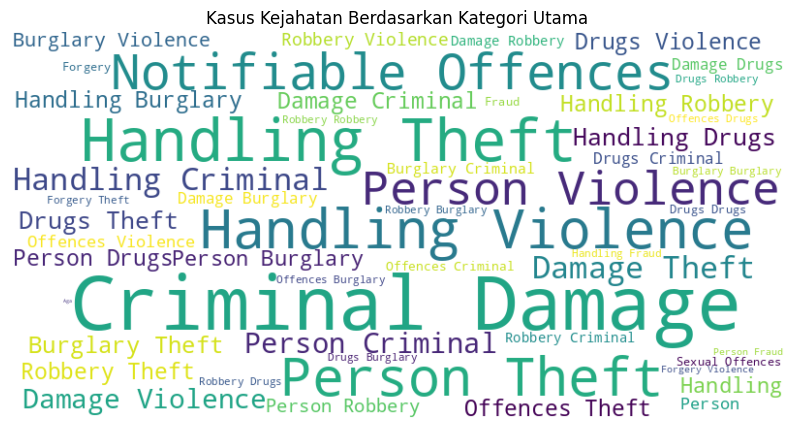

In [95]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['major_category']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Kasus Kejahatan Berdasarkan Kategori Utama')
plt.axis('off')
plt.show()

**Kesimpulan**: Dari gambar wordcloud di atas, kejahatan dengan tulisan besar merupakan kejahatan yang sering terjadi di London diantaranya Notifable Offences, Handling Theft, Person Violence, Handling Violece, Criminal Damage, dan Person Theft.

## Folium Maps

In [116]:
df_borough = df.sort_values('borough')
df_borough.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
17584,E01000114,Barking and Dagenham,Violence Against the Person,Offensive Weapon,0.0,2011,5
24388,E01000100,Barking and Dagenham,Criminal Damage,Criminal Damage To Dwelling,0.0,2014,10
3724,E01000045,Barking and Dagenham,Fraud or Forgery,Other Fraud & Forgery,0.0,2009,2
5912,E01000053,Barking and Dagenham,Violence Against the Person,Assault with Injury,4.0,2010,3
8593,E01000023,Barking and Dagenham,Violence Against the Person,Wounding/GBH,1.0,2014,11


In [103]:
# get the first 100 crimes in the df_borough dataframe
limit = 100
df_borough = df_borough.iloc[0:limit, :]

In [105]:
df_borough.shape

(100, 7)

In [119]:
df_borough.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30339 entries, 17584 to 8911
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lsoa_code       30339 non-null  object 
 1   borough         30339 non-null  object 
 2   major_category  30339 non-null  object 
 3   minor_category  30339 non-null  object 
 4   value           30339 non-null  float64
 5   year            30339 non-null  int64  
 6   month           30339 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.9+ MB


In [96]:
# London latitude and longitude values
latitude = 51.509865
longitude = -0.118092

In [97]:
# create map and display
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of London
london_map